In [ ]:
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visualization & plotting

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import roc_auc_score

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Read-in the dataset
Insurance_Data = pd.read_csv('carInsurance_train.csv')
print('Train Data Shape - ', Insurance_Data.shape)
Insurance_Data.head()

Train Data Shape -  (4000, 19)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [ ]:
# What type of values are stored in the columns?
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [ ]:
# Let's look at some statistical information about our dataframe.
Insurance_Data.describe(include='all')

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
count,4000.000000,4000.000000,3981,4000,3831,4000.000000,4000.000000,4000.00000,4000.000000,3098,4000.000000,4000,4000.000000,4000.000000,4000.000000,958,4000,4000,4000.000000
unique,NaN,NaN,11,3,3,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN,NaN,3,3777,3764,NaN
top,NaN,NaN,management,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,failure,17:02:39,10:22:30,NaN
freq,NaN,NaN,893,2304,1988,NaN,NaN,NaN,NaN,2831,NaN,1049,NaN,NaN,NaN,437,3,3,NaN
mean,2000.500000,41.214750,NaN,NaN,NaN,0.014500,1532.937250,0.49275,0.133000,NaN,15.721250,NaN,2.607250,48.706500,0.717500,NaN,NaN,NaN,0.401000
std,1154.844867,11.550194,NaN,NaN,NaN,0.119555,3511.452489,0.50001,0.339617,NaN,8.425307,NaN,3.064204,106.685385,2.078647,NaN,NaN,NaN,0.490162
min,1.000000,18.000000,NaN,NaN,NaN,0.000000,-3058.000000,0.00000,0.000000,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
25%,1000.750000,32.000000,NaN,NaN,NaN,0.000000,111.000000,0.00000,0.000000,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
50%,2000.500000,39.000000,NaN,NaN,NaN,0.000000,551.500000,0.00000,0.000000,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
75%,3000.250000,49.000000,NaN,NaN,NaN,0.000000,1619.000000,1.00000,0.000000,NaN,22.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN,NaN,1.000000


In [ ]:
# This is how we can get summary for the categorical data
Insurance_Data.describe(include=np.object)

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:02:39,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


In [ ]:
Target = 'CarInsurance'
# pd.crosstab(Insurance_Data[Target], columns='N', normalize=True)
pd.crosstab(Insurance_Data[Target], columns='N')
# pd.crosstab(Insurance_Data[Target], columns='N')

col_0,N
CarInsurance,
0,2396
1,1604


In [ ]:
num_cols = Insurance_Data.select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = Insurance_Data.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
num_cols

['Id',
 'Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'CarInsurance']

In [ ]:
non_num_cols

['Job',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome',
 'CallStart',
 'CallEnd']

In [ ]:
# Lets drop columns which we will not use
num_cols = Insurance_Data.drop(['Id', 'CarInsurance'],axis=1).select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = Insurance_Data.drop(['CallStart', 'CallEnd'],axis=1).select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
print('Numeric Columns \n', num_cols)
print('Non-Numeric Columns \n', non_num_cols)

Numeric Columns 
 ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']
Non-Numeric Columns 
 ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d1bb7f090>,
      dtype=object)

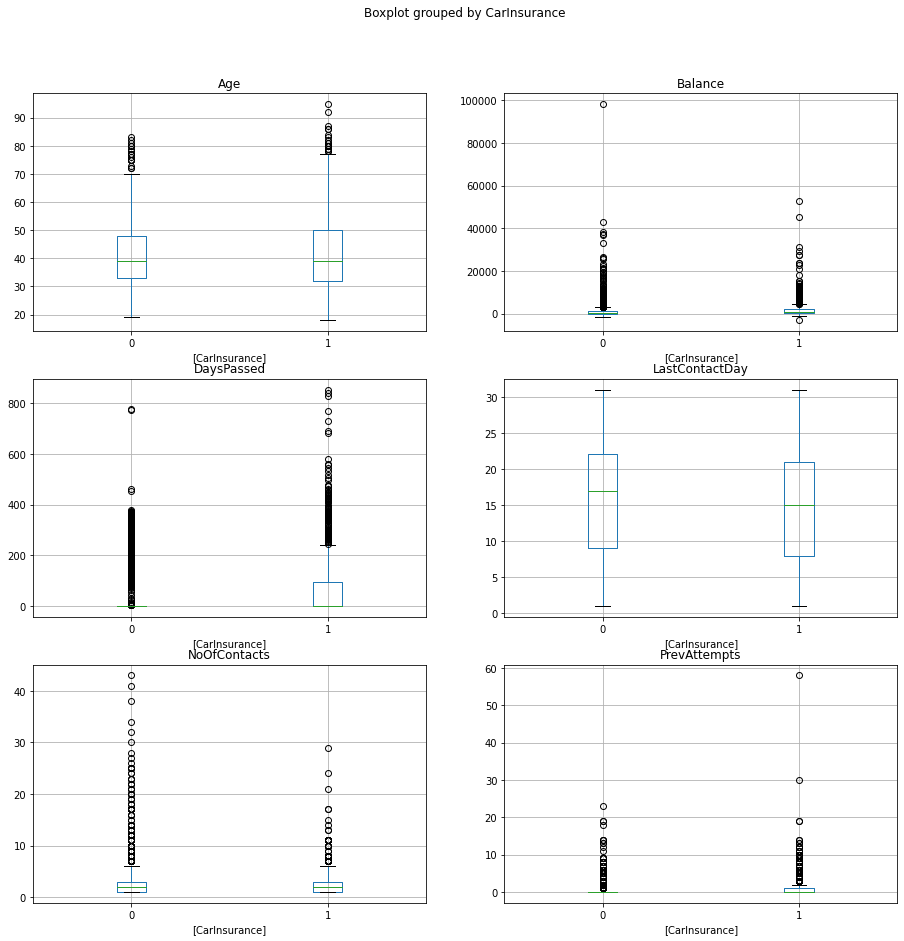

In [ ]:
# Lets drop CarLoan, HHInsurance, Default from the numeric columns as these are dummies
num_cols_viz = ['DaysPassed', 'Age', 'NoOfContacts', 'PrevAttempts', 'LastContactDay', 'Balance']

fig, axes = plt.subplots(3,2,sharex=False,sharey=False, figsize=(15,15))
Insurance_Data.loc[:,[Target]+num_cols_viz].boxplot(by=Target, ax=axes)

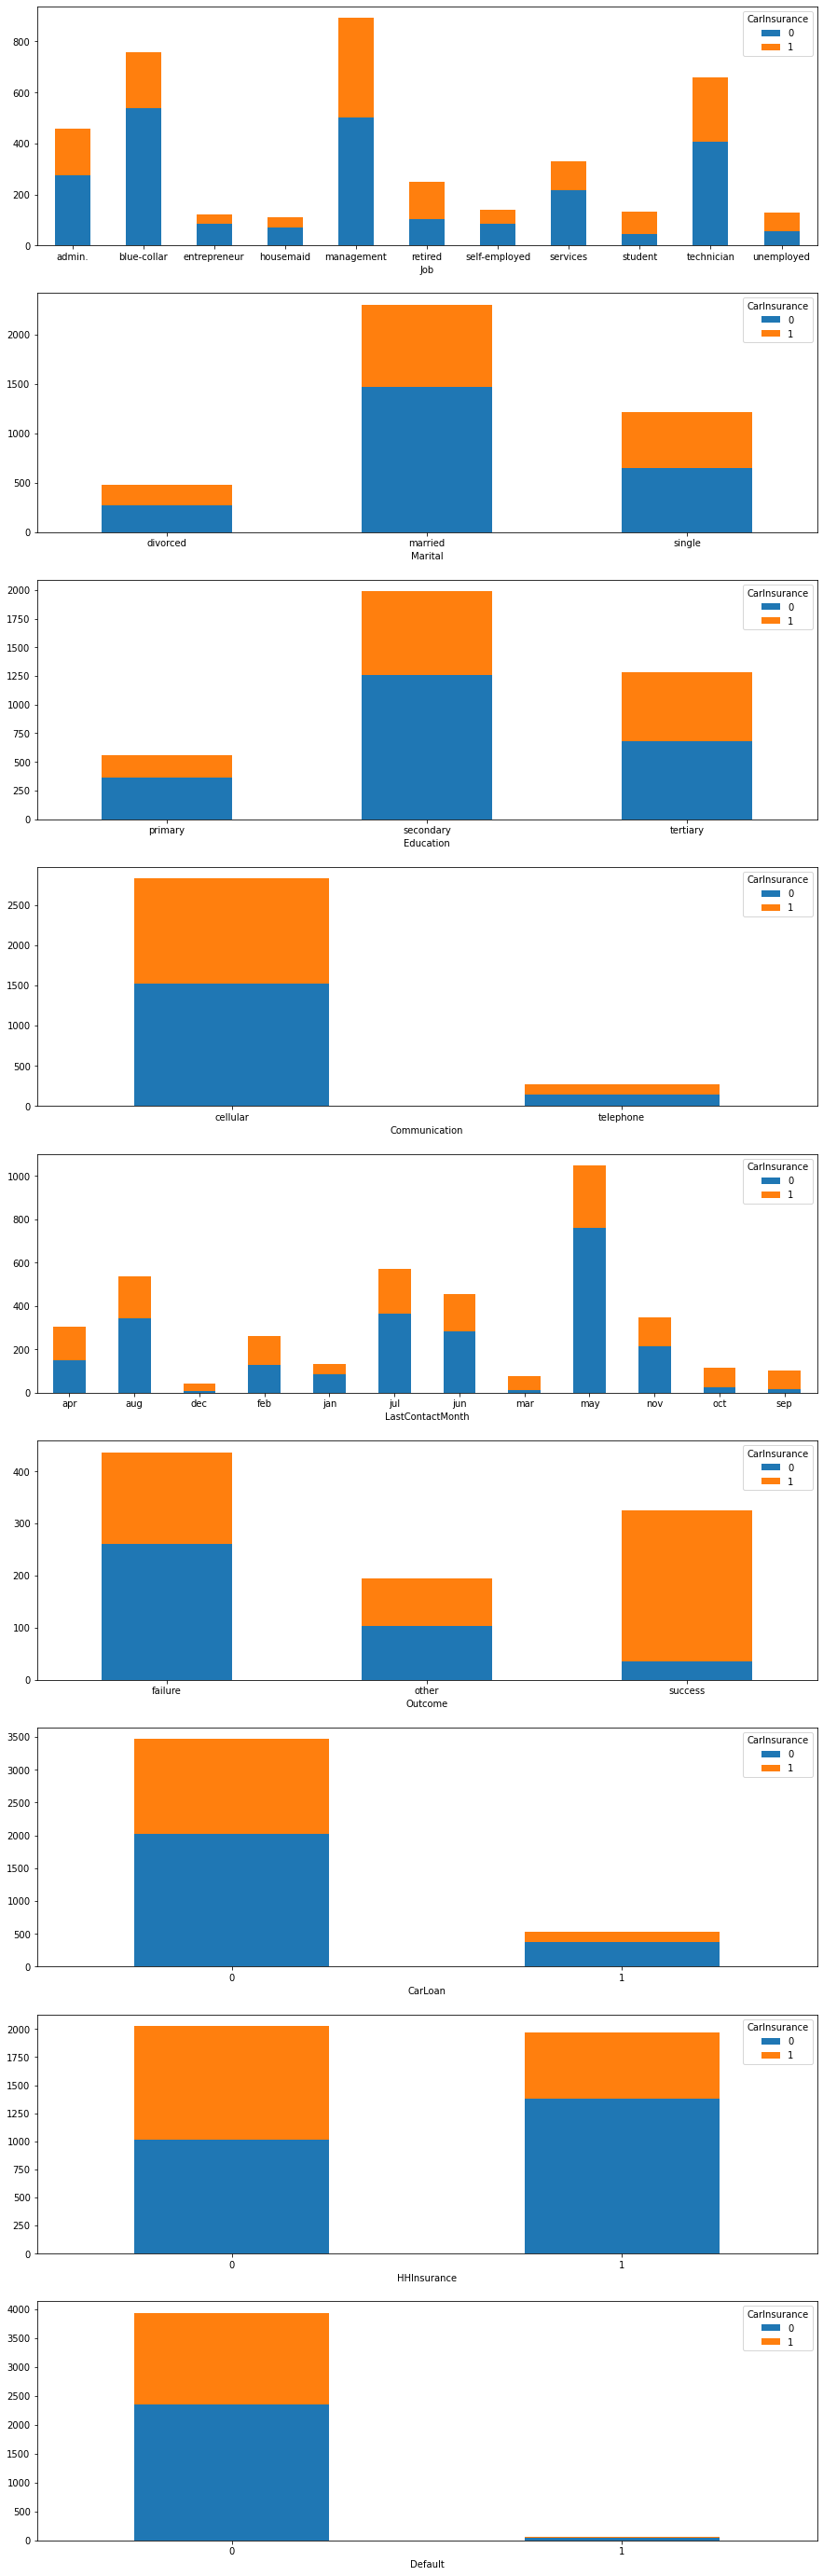

In [ ]:
non_num_cols_viz = non_num_cols+['CarLoan', 'HHInsurance', 'Default']
fig, axes = plt.subplots(len(non_num_cols_viz),sharex=False,sharey=False, figsize=(15,50))
for i in range(len(non_num_cols_viz)):
    pd.crosstab(Insurance_Data[non_num_cols_viz[i]], Insurance_Data[Target]).plot(kind='bar', 
                                                                                  stacked=True, 
                                                                                  grid=False, 
                                                                                  ax=axes[i],
                                                                                  rot=0)

In [ ]:
# pd.crosstab(Insurance_Data['Job'], Insurance_Data[Target])#columns='N')
pd.crosstab(Insurance_Data['Job'], columns='Count')

col_0,Count
Job,
admin.,459
blue-collar,759
entrepreneur,121
housemaid,109
management,893
retired,249
self-employed,140
services,330
student,131


In [ ]:
Insurance_Data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [ ]:
Insurance_Data_Org = Insurance_Data.copy()

In [ ]:
Insurance_Data['Job'].value_counts(dropna=False)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
NaN               19
Name: Job, dtype: int64

In [ ]:
Insurance_Data['Job'] = Insurance_Data['Job'].fillna('None')
Insurance_Data['Job'].isnull().sum()

0

In [ ]:
Insurance_Data['Job'].value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
None              19
Name: Job, dtype: int64

In [ ]:
# Fill missing education with the most common education level by job type

# Create job-education level mode mapping
edu_mode=[]

# What are different Job Types
job_types = Insurance_Data.Job.value_counts().index
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'None'],
      dtype='object')

In [ ]:
# Now according to the job type we will crate a mapping where the job and mode of education is there.
# It means when there are many people in the managment job then most of them are in which education.
# We can find that in below mapping

for job in job_types:
    mode = Insurance_Data[Insurance_Data.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=Insurance_Data.Job.value_counts().index)

edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
student          secondary
unemployed       secondary
entrepreneur      tertiary
housemaid          primary
None             secondary
dtype: object

In [ ]:
# Apply the mapping to missing education obs. We will replace education now by jobs value
for j in job_types:
    Insurance_Data.loc[(Insurance_Data['Education'].isnull()) & (Insurance_Data['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

# For those who are not getting mapped we will create a new category as None
Insurance_Data['Education'].fillna('None',inplace=True)

In [ ]:
Insurance_Data.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [ ]:
# Fill missing communication with none 
Insurance_Data['Communication'].value_counts(dropna=False)

cellular     2831
NaN           902
telephone     267
Name: Communication, dtype: int64

In [ ]:
Insurance_Data['Communication'] = Insurance_Data['Communication'].fillna('None')

In [ ]:
# Check for missing value in Outcome
Insurance_Data['Outcome'].value_counts(dropna=False)

NaN        3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [ ]:
# Fill missing outcome as not in previous campaign, we are adding one category to Outcome
# We will add category if the value of DaysPassed is -1

Insurance_Data.loc[Insurance_Data['DaysPassed']==-1,'Outcome']= 'NoPrev'
Insurance_Data['Outcome'].value_counts(dropna=False)

NoPrev     3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [ ]:
# Check if we have any missing values left
Insurance_Data.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [ ]:
Insurance_Data_num = Insurance_Data[num_cols+['Id', 'CarInsurance']]

In [ ]:
# Categorical columns data
Insurance_Data_cat = Insurance_Data[non_num_cols]
non_num_cols

['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']

In [ ]:
# Create dummies
Insurance_Data_cat_dummies = pd.get_dummies(Insurance_Data_cat)  #One-Hot Embedding
print(Insurance_Data_cat_dummies.shape)
Insurance_Data_cat_dummies.head()

(4000, 37)


,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_divorced,Marital_married,Marital_single,Education_primary,Education_secondary,Education_tertiary,Communication_None,Communication_cellular,Communication_telephone,LastContactMonth_apr,LastContactMonth_aug,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
Insurance_Data_final = pd.concat([Insurance_Data_num, Insurance_Data_cat_dummies], axis=1)
print(Insurance_Data_final.shape)
Insurance_Data_final.head()

(4000, 48)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Id,CarInsurance,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_divorced,Marital_married,Marital_single,Education_primary,Education_secondary,Education_tertiary,Communication_None,Communication_cellular,Communication_telephone,LastContactMonth_apr,LastContactMonth_aug,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,32,0,1218,1,0,28,2,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,32,0,1156,1,0,26,5,-1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,25,0,373,1,0,11,2,-1,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
# Checking if there are missing values before we run model
Insurance_Data_final.isnull().sum(axis = 0)

Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Id                         0
CarInsurance               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMon

In [ ]:
train_df = Insurance_Data_final.drop(['Id', 'CarInsurance'], axis=1) #X
train_label = Insurance_Data_final['CarInsurance'] #y

In [ ]:
#random_state is the seed used by the random number generator. It can be any integer.
# Train test split
X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, train_size=0.7 , stratify=train_label, random_state=100)

In [ ]:
print(y_train.shape[0]) # 2800, 1123 are 1s and the rest (2800-1123=1677) 0s
print(np.sum(y_train))
print(y_test.shape[0]) # 1200, 481 are 1s and the rest (1200-481=719) 0s
print(np.sum(y_test))

2800
1123
1200
481


In [ ]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (2800, 46)
Test shape  -  (1200, 46)


 
# AdaBoost 

In [ ]:
# sklearn.ensemble.AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
# from sklearn.ensemble import AdaBoostClassifier

# Define Model parameters to tune
model_parameters = { 'n_estimators': [100, 200, 300, 400, 500],
                    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
                    'algorithm': ['SAMME.R', 'SAMME']}

In [ ]:
# Gridsearch the parameters to find the best parameters.
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1) 
                                  
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,
                    cv=3,  # 3-Fold Cross Validation
                    verbose=3, #To print what it is doing
                    n_jobs=-1, #fastest possible depending in the laptop
                    scoring='roc_auc') #tell us 1 f1-score per combination


gscv.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
                         'n_estimators': [100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [ ]:
print('The best parameter are -', gscv.best_params_) # .best_params_ starts with dot, ends with _ --> attribute/property of gscv model

The best parameter are - {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 400}


In [ ]:
# More attributes of gscv --> attributes only give info without executing anything
print(gscv.best_score_)
print(gscv.best_estimator_)
print(gscv.scorer_)

# . dot and ends with brackets --> methods .fit(), .predict(), .predict_proba()

0.747329094374238
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=400, random_state=1)
make_scorer(roc_auc_score, needs_threshold=True)


In [ ]:
print('AUC on train by gscv =', roc_auc_score(y_true=y_train,
                                                        y_score=gscv.predict_proba(X_train)[:, 1]))

AUC on train by gscv = 0.773700651685286


In [ ]:
print('AUC on test by gscv =', roc_auc_score(y_true=y_test,
                                                        y_score=gscv.predict_proba(X_test)[:, 1]))

AUC on test by gscv = 0.744765627936699


### Gradient Boosting 

In [ ]:
# sklearn.ensemble.GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_parameters = { 'n_estimators': [100, 200, 300, 400, 500],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'max_depth': [1, 2, 3, 4, 5],
                    'min_samples_leaf': [1, 20, 30, 50]
                    }

In [ ]:
model = GradientBoostingClassifier(random_state=1)

                                
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=3,  # 3-Fold Cross Validation
                    verbose=3, #To print what it is doing
                    n_jobs=-1, #fastest possible depending in the laptop
                    scoring='roc_auc') 

gscv.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 12.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 20, 'n_estimators': 200}


In [ ]:
print('AUC on train by gscv =', roc_auc_score(y_true=y_train,
                                                        y_score=gscv.predict_proba(X_train)[:, 1]))

AUC on train by gscv = 0.8324258696703768


In [ ]:
print('AUC on test by gscv =', roc_auc_score(y_true=y_test,
                                                        y_score=gscv.predict_proba(X_test)[:, 1]))

AUC on test by gscv = 0.7636443547431032


In [ ]:
# XGBoost - not included in the sklearn package, XGBoost is a standalone package
# But the good thing is that XGBoost provides a way to use it with sklearn

### XGBoosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_parameters = { 'n_estimators': [100, 200, 300, 400, 500],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'max_depth': [1, 2, 3, 4, 5],
                    'min_samples_leaf': [1, 20, 30, 50]
                    }

In [ ]:
model = XGBClassifier(random_state=1)

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=3,  # 3-Fold Cross Validation
                    verbose=3, #To print what it is doing
                    n_jobs=-1, #fastest possible depending in the laptop
                    scoring='roc_auc') #tell us 1 f1-score per combination

gscv.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  8.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 20, 30, 50],
 

In [ ]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 200}


In [ ]:
print(gscv.best_score_)
print(gscv.best_estimator_)
print(gscv.scorer_)

0.7591992363921228
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_samples_leaf=1, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
make_scorer(roc_auc_score, needs_threshold=True)


In [ ]:
print('AUC on train by gscv =', roc_auc_score(y_true=y_train,
                                                        y_score=gscv.predict_proba(X_train)[:, 1]))

AUC on train by gscv = 0.8648301280060066


In [ ]:
print('AUC on test by gscv =', roc_auc_score(y_true=y_test,
                                                        y_score=gscv.predict_proba(X_test)[:, 1]))

AUC on test by gscv = 0.7617923368966484


In [ ]:
# XGBoost speed of performance on small data is comparable to the speed of performance of Sklearn's Gradient Boosting on the same small data.
# While XGBoost can do Gradient Boosting on Big Data (100s of TeraBytes, TBs), Sklearn's Gradient Boosting cannot even handle this
# much of data,  it let away speed of performance/processing.